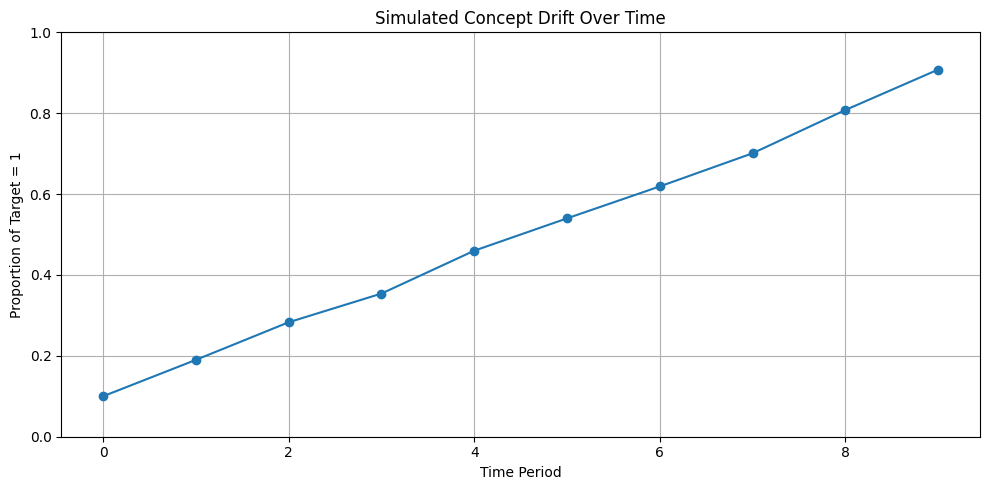

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Simulate time periods
np.random.seed(42)
time_periods = 10  # e.g., 10 months
samples_per_period = 1000

# Step 2: Gradually change the probability of target = 1 over time
data = []
for t in range(time_periods):
    prob_1 = 0.1 + (0.8 / (time_periods - 1)) * t  # linearly increase from 0.1 to 0.9
    targets = np.random.choice([0, 1], size=samples_per_period, p=[1 - prob_1, prob_1])
    period_data = pd.DataFrame({
        'time_period': [t] * samples_per_period,
        'target': targets
    })
    data.append(period_data)

# Step 3: Combine into one DataFrame
df = pd.concat(data, ignore_index=True)

# Step 4: Compute proportion of target=1 over time
drift_data = df.groupby('time_period')['target'].mean().reset_index()

# Step 5: Plot the concept drift
plt.figure(figsize=(10, 5))
plt.plot(drift_data['time_period'], drift_data['target'], marker='o', linestyle='-')
plt.title('Simulated Concept Drift Over Time')
plt.xlabel('Time Period')
plt.ylabel('Proportion of Target = 1')
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()
